In [1]:
from precession import Precession
from lensing import Lensing
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from helper_funcs import  Sn

from pycbc.filter import overlap, match, matched_filter

In [26]:
solar_mass = 4.92624076 * 1e-6 #[solar_mass] = sec
giga_parsec = 1.02927125 * 1e17 #[giga_parsec] = sec
year = 31557600 #[year] = sec

angle_params = {
                'theta_J': 0.,
                'phi_J': 0.,
                'theta_S': np.pi/3,
                'phi_S': 0.
                }

common_params = { 
                'mcz': 20 * solar_mass, 'dist': 1.5 * giga_parsec, 
                'eta': 0.25, 'tc': 0.0, 'phi_c': 0.0
                }

default_precession_params = {
    'theta_S' : angle_params['theta_S'], 
    'phi_S' : angle_params['phi_S'], 
    'theta_J' : angle_params['theta_J'], 
    'phi_J' : angle_params['phi_J'], 
    'mcz' : common_params['mcz'], 
    'dist': common_params['dist'], 
    'eta' : common_params['eta'], 
    'tc' : common_params['tc'], 
    'phi_c' : common_params['phi_c'],
    'theta_tilde': 2.,
    'omega_tilde': 10.,
    'gamma_P': 0.
}

def_prece = Precession(default_precession_params)

In [27]:
default_lensing_params = {
    'theta_S' : angle_params['theta_S'], 
    'phi_S' : angle_params['phi_S'], 
    'theta_L' : angle_params['theta_J'], 
    'phi_L' : angle_params['phi_J'], 
    'mcz' : common_params['mcz'], 
    'dist': common_params['dist'], 
    'eta' : common_params['eta'], 
    'tc' : common_params['tc'], 
    'phi_c' : common_params['phi_c'],
    'y': 0.4,
    'MLz': 4e3 * solar_mass
}

def_lens = Lensing(default_lensing_params)

In [28]:
f_cut = Precession(default_precession_params).get_f_cut()
f_min = 20
delta_f = 0.25
f_range = np.arange(f_min, f_cut, delta_f)

psd = Sn(f_range)

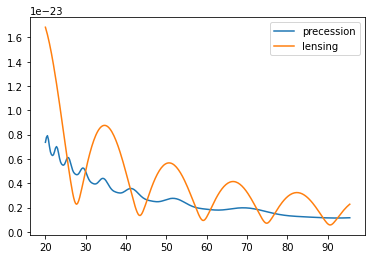

In [29]:
precessing_strain = def_prece.precessing_strain(f_range, delta_f=delta_f)
lensing_strain = def_lens.lensing_strain(f_range, delta_f=delta_f)
plt.plot(f_range, np.abs(precessing_strain), label='precession')
plt.plot(f_range, np.abs(lensing_strain), label='lensing')
plt.legend()

In [13]:
num_pts = 70
theta_tilde_range = np.linspace(1, 8, num_pts)
y_range = np.linspace(0.1, 1, num_pts)
theta_tilde_mesh, y_mesh = np.meshgrid(theta_tilde_range, y_range)
theta_tilde_mesh = theta_tilde_mesh.flatten()
y_mesh = y_mesh.flatten()
match_theta_tilde = np.zeros_like(y_mesh)

for i in range(theta_tilde_mesh.shape[0]):
    precession_params = default_precession_params
    lensing_params = default_lensing_params
    precession_params['theta_tilde'] = theta_tilde_mesh[i]
    lensing_params['y'] = y_mesh[i]

    precession_init = Precession(precession_params)
    lensing_init = Lensing(lensing_params)
    hP = precession_init.precessing_strain(f_range, delta_f=delta_f)
    hL = lensing_init.lensing_strain(f_range, delta_f=delta_f)
    match_theta_tilde[i] = match(hP, hL, psd)[0]

In [14]:
y_mesh = y_mesh.reshape(num_pts, num_pts)
theta_tilde_mesh = theta_tilde_mesh.reshape(num_pts, num_pts)
match_theta_tilde = match_theta_tilde.reshape(num_pts, num_pts)

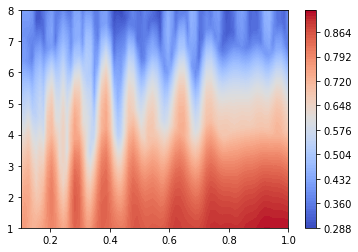

In [17]:
plt.contourf(y_mesh, theta_tilde_mesh, match_theta_tilde, levels=100, cmap='coolwarm')
plt.colorbar()